In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Task 1: Simple Linear Regression

- Use the scikit-learn library.
- Load the California Housing Dataset (or any house price dataset).
- Predict the house price using a single feature (e.g., number of rooms).
- Train a simple linear regression model.
- Plot the regression line using matplotlib.

In [2]:
california = fetch_california_housing()
X = california.data  
y = california.target

print("Feature names:", california.feature_names)
print("target names:", california.target_names)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
target names: ['MedHouseVal']


In [3]:
print(california.keys())
print(california.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8)


In [4]:
X_room = X[:, [2]]    # select AveRooms as single feature

X_train, X_test, y_train, y_test = train_test_split(X_room, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print model coefficients
print(f"Coefficient: {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

Coefficient: 0.0768
Intercept: 1.6548


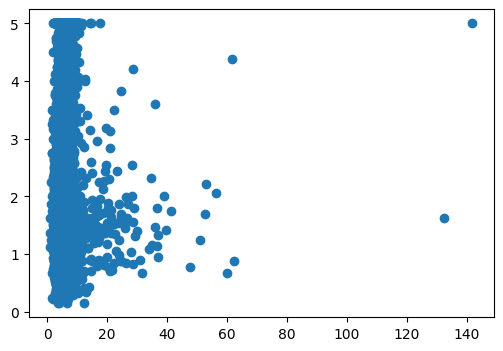

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(X_room,y)
plt.show()

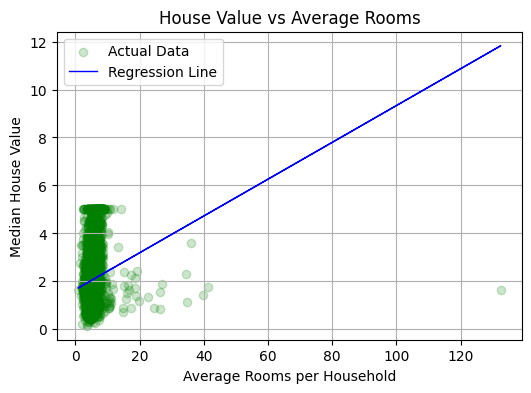

In [6]:


sorted_idx = np.argsort(X_test[:, 0])

plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='g', label='Actual Data', alpha=0.2)
plt.plot(X_test, y_pred, color='b', label='Regression Line', linewidth=1)

plt.xlabel("Average Rooms per Household")
plt.ylabel("Median House Value")

plt.title("House Value vs Average Rooms")
plt.grid(True)
plt.legend()

plt.show()

## Task 2: Multiple Linear Regression 

- Use the same dataset or load another dataset with at least 4 numeric 
features. 
- Predict the target variable using multiple independent variables. 
- Evaluate the model using: 
- R-squared 
- Mean Squared Error (MSE) 
- Root Mean Squared Error (RMSE) 
- Display the coefficients of each feature. 

In [7]:
import pandas as pd

In [8]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [9]:

df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
input_colms=data.feature_names
output_colms=data.target_names

X_data = df[input_colms]
Y_data = df[output_colms]
X_data.head()
Y_data.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [11]:
X_data = X_data
Y_data = Y_data.values.reshape(-1)

In [12]:
print(X_data.shape, Y_data.shape)

(20640, 8) (20640,)


In [13]:

X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,train_size = 0.2,random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.intercept_)
model.coef_

-37.764304845474946


array([ 4.25546113e-01,  9.15501577e-03, -9.43236037e-02,  6.74748060e-01,
        4.88938032e-06, -1.50778303e-03, -4.27714004e-01, -4.42739701e-01])

In [15]:
# R-squared
r2 = r2_score(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

print(f"R2 Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

R2 Score: 0.6070
Mean Squared Error (MSE): 0.5218
Root Mean Squared Error (RMSE): 0.7224


In [16]:
# Create a DataFrame to display feature names and their coefficients
coefficients = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': model.coef_
})

print("\nFeature Coefficients:")
print(coefficients)


Feature Coefficients:
      Feature  Coefficient
0      MedInc     0.425546
1    HouseAge     0.009155
2    AveRooms    -0.094324
3   AveBedrms     0.674748
4  Population     0.000005
5    AveOccup    -0.001508
6    Latitude    -0.427714
7   Longitude    -0.442740


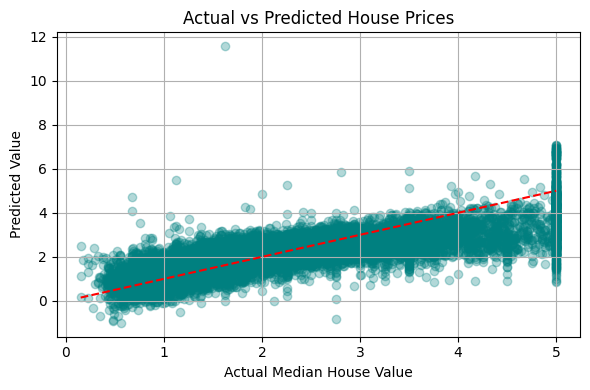

In [17]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.3, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

## Task 3: Feature Scaling and Normalization 

- Demonstrate the effect of standardizing features using 
StandardScaler. 
- Compare model performance before and after scaling. 

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [20]:
input_colms=data.feature_names
output_colms=data.target_names

In [21]:

X_data = df[input_colms]
Y_data = df[output_colms]

X_data = X_data.values
Y_data = Y_data.values.reshape(-1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data,Y_data,train_size = 0.2,random_state=42)

In [23]:
# Train model without scaling
model_raw = LinearRegression()
model_raw.fit(X_train, y_train)

y_pred_raw = model_raw.predict(X_test)

mse_raw = mean_squared_error(y_test, y_pred_raw)
rmse_raw = np.sqrt(mse_raw)
r2_raw = r2_score(y_test, y_pred_raw)

print("WITHOUT SCALING:")
print(f"R2 Score: {r2_raw:.4f}")
print(f"MSE: {mse_raw:.4f}")
print(f"RMSE: {rmse_raw:.4f}")

WITHOUT SCALING:
R2 Score: 0.6070
MSE: 0.5218
RMSE: 0.7224


In [24]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("\nWITH STANDARD SCALING:")
print(f"R2 Score: {r2_scaled:.4f}")
print(f"MSE: {mse_scaled:.4f}")
print(f"RMSE: {rmse_scaled:.4f}")


WITH STANDARD SCALING:
R2 Score: 0.6070
MSE: 0.5218
RMSE: 0.7224


In [25]:

print("\nCOMPARISON:")
print(f"{'Metric'} | {'Without Scaling'} | {'With Scaling'}")
print("-" * 45)
print(f"{'R²':<10} | {r2_raw:<15.4f} | {r2_scaled:<15.4f}")
print(f"{'MSE':<10} | {mse_raw:<15.4f} | {mse_scaled:<15.4f}")
print(f"{'RMSE':<10} | {rmse_raw:<15.4f} | {rmse_scaled:<15.4f}")


COMPARISON:
Metric | Without Scaling | With Scaling
---------------------------------------------
R²         | 0.6070          | 0.6070         
MSE        | 0.5218          | 0.5218         
RMSE       | 0.7224          | 0.7224         


## Task 4: Model Interpretation 

- Write Python code to: 
-  Show the correlation matrix using a heatmap. 
- Identify which features have the strongest relationship with 
the target. 
- Discuss multicollinearity and how it might affect regression. 

In [26]:
import seaborn as sns

In [27]:
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['MedHouseVal']=data.target

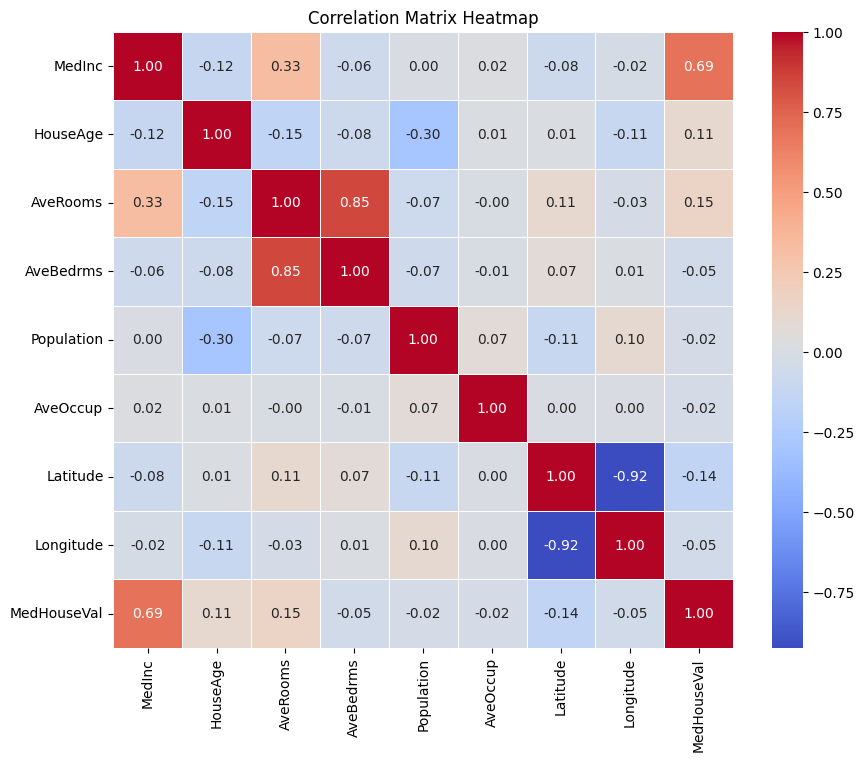

In [28]:
matrix=df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(matrix, annot=True, cmap='coolwarm',fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
target_corr = matrix["MedHouseVal"]
target_corr

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms     -0.046701
Population    -0.024650
AveOccup      -0.023737
Latitude      -0.144160
Longitude     -0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64

In [30]:

print("Feature Correlation with Target:\n")
print(target_corr.sort_values(ascending=False))

Feature Correlation with Target:

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


In [31]:

print(f"Correlation between AveRooms and AveBedrms: {df['AveRooms'].corr(df['AveBedrms']):.4f}")

Correlation between AveRooms and AveBedrms: 0.8476


**Strongest Relationships with Target**
  
  1. *MedInc* has the strongest positive correlation (0.688) with house value.
  2. *AveRooms* and *HouseAge* show weak positive correlations.

**Multicollinearity?**

- Multicollinearity occurs when independent variables are highly correlated with each other.
- This means that one feature can be linearly predicted from another with a substantial degree of accuracy.


**Effects of Multicollinearity on Regression:**

- Unstable Coefficients

    1. Regression struggles to determine how much each correlated feature contributes.

    2. Coefficients may flip signs or vary wildly with small data changes.

- Incorrect Interpretation

    1. It's hard to trust the importance or influence of individual features.

    2. You might incorrectly think a variable has no effect (even when it does).

- Reduced Model Reliability

    1. Increases the standard errors of coefficients.

    2. Makes the model less precise in estimating true relationships.

- Statistical Significance Becomes Misleading

    1. Features may appear insignificant (high p-value) due to shared information.






